In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#Setting working directory

os.chdir("D:/Edwisor/Project 2")

print(os.getcwd())

D:\Edwisor\Project 2


In [3]:
#Loading the data

data = pd.read_csv("day.csv")

### Understanding the Data:

In [4]:
#checking first five rows of the  dataset

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#checking the number of rows and columns in  dataset
print("shape of  data is: ",data.shape)

shape of  data is:  (731, 16)


In [6]:
#checking the data-types in  dataset
data.dtypes 

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Data Cleaning, Missing Value Analysis And Outliers Analysis:

1. Variable "instant" can be dropped as it simply represents the index.
2. casual and registered variables can be removed, as these two sums to dependent variable count
3. Variable "dteday" can be ignored as output is not based on time series analysis. And we already have data in year and month column

In [8]:
data = data.drop(columns=['instant','dteday', 'casual', 'registered'])

In [9]:
#Converting variables datatype to required datatypes

data['season'] = data['season'].astype(str)
data['yr']     = data['yr'].astype(str)
data['mnth']   = data['mnth'].astype(str)
data['holiday']= data['holiday'].astype(str)
data['weekday']= data['weekday'].astype(str)
data['workingday']= data['workingday'].astype(str)
data['weathersit']= data['weathersit'].astype(str)

In [10]:
data.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [11]:
#Defining numeric and categorical variables and saving in specific array

numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Missing Value Analysis

In [12]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### No missing values found

### Outlier Analysis

temp


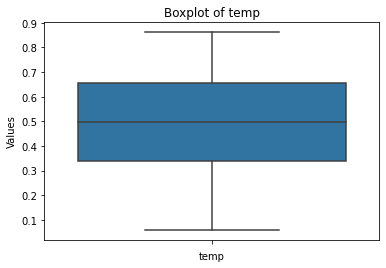

atemp


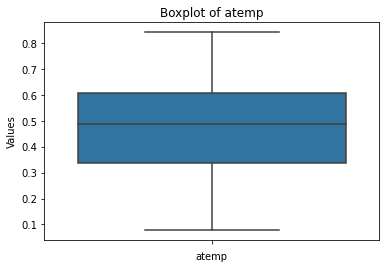

hum


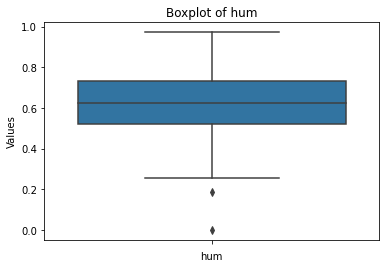

windspeed


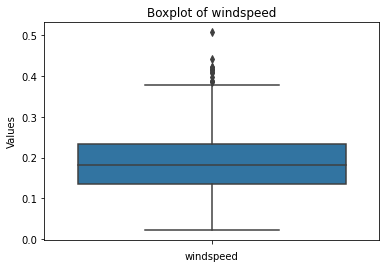

cnt


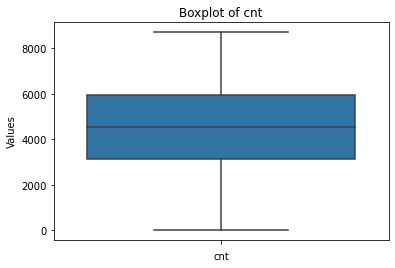

In [13]:
# checking boxplot of continous variables

for i in numeric_var:
    print(i)
    sns.boxplot(y = data[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

Outliers are found in windspeed and humidity variables.

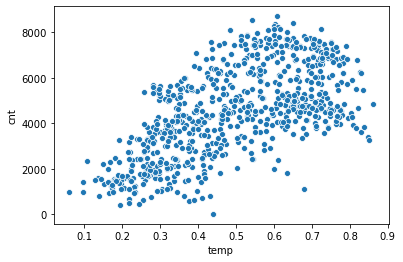

In [14]:
#Scatter plot for temp against cnt 
sns.scatterplot(data=data,x='temp',y='cnt')

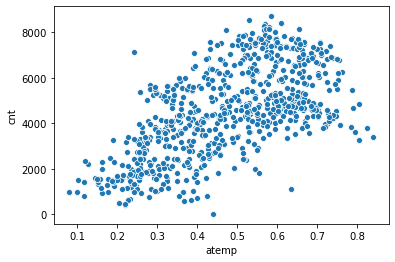

In [15]:
#Scatter plot for atemp against cnt 
sns.scatterplot(data=data,x='atemp',y='cnt')

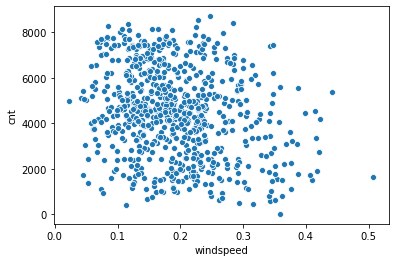

In [16]:
#Scatter plot for windspeed against cnt 
sns.scatterplot(data=data,x='windspeed',y='cnt')

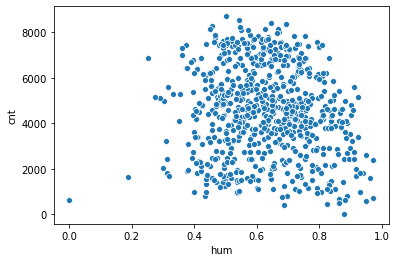

In [17]:
#Scatter plot for hum against cnt 
sns.scatterplot(data=data,x='hum',y='cnt')

In [18]:
# from the boxplot analysis, it is clear that continous variables windspeed, hum and casual includes the outliers.

count_names = ['windspeed','hum']
for i in count_names:
    print (i)
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    data.loc[data[i]<min,i]=np.nan
    data.loc[data[i]>max,i]=np.nan

windspeed
-0.012446750000000034
0.38061125
hum
0.20468725
1.0455212500000002


In [19]:
# checking missing values
data.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [20]:
# total 15 outliers found. Now, we will impute the values with mean as humidity and windspeed is almost normally distributed

data['hum'] = data['hum'].fillna(data['hum'].mean())
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

In [21]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Data Understanding

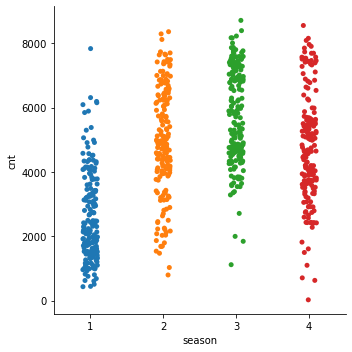

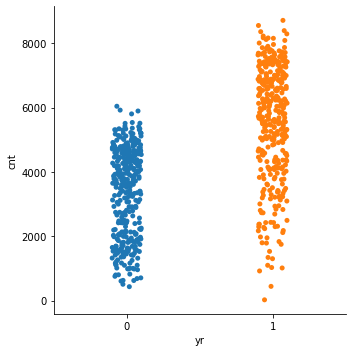

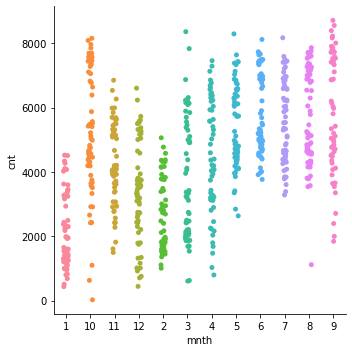

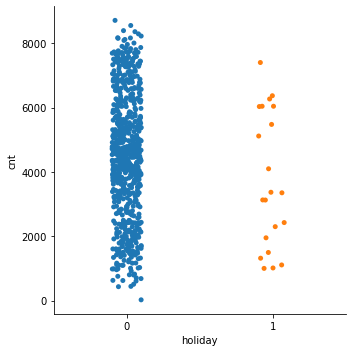

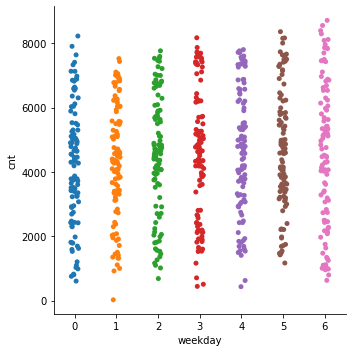

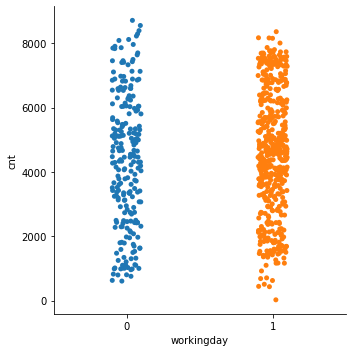

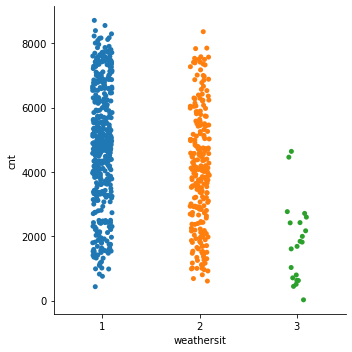

In [22]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=data)
   
  

We can observe the following from above graphs:
1. In Season 2, 3 and 4 has the highest count
2. In Year 1 has high count than Year 0
3. In Months 3 to 10 has got pretty good count
4. On non- holidays the count is higher compared holidays
5. In weekdays, all 0 to 6 has the almost similar count
6. In weather, 1 has the highest count

### Feature Selection and Scaling 

In [23]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

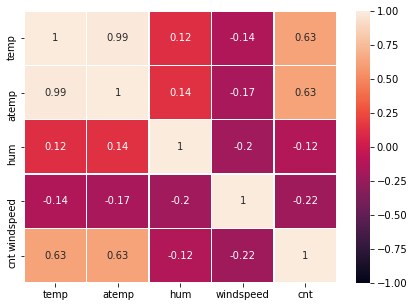

In [24]:
# Correlation Analysis on continous variables
# generating heatmap

cnames = ['temp','atemp', 'hum', 'windspeed', 'cnt']
data_corr = data.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

# correlation matrix
corr = data_corr.corr()

sns.heatmap(corr, ax=ax, linewidths=0.5, vmin= -1.0, annot=True)

In [25]:
# checking VIF for multicolinerity for continous variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_data = add_constant(data.iloc[:,7:11])
pd.Series([variance_inflation_factor(VIF_data.values, i) 
               for i in range(VIF_data.shape[1])], 
              index=VIF_data.columns)

const        45.499530
temp         63.010048
atemp        63.632085
hum           1.059230
windspeed     1.097383
dtype: float64

From heatmap and VIF, Removing variables atemp beacuse it is highly correlated with temp

In [26]:
data = data.drop(columns=['atemp'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


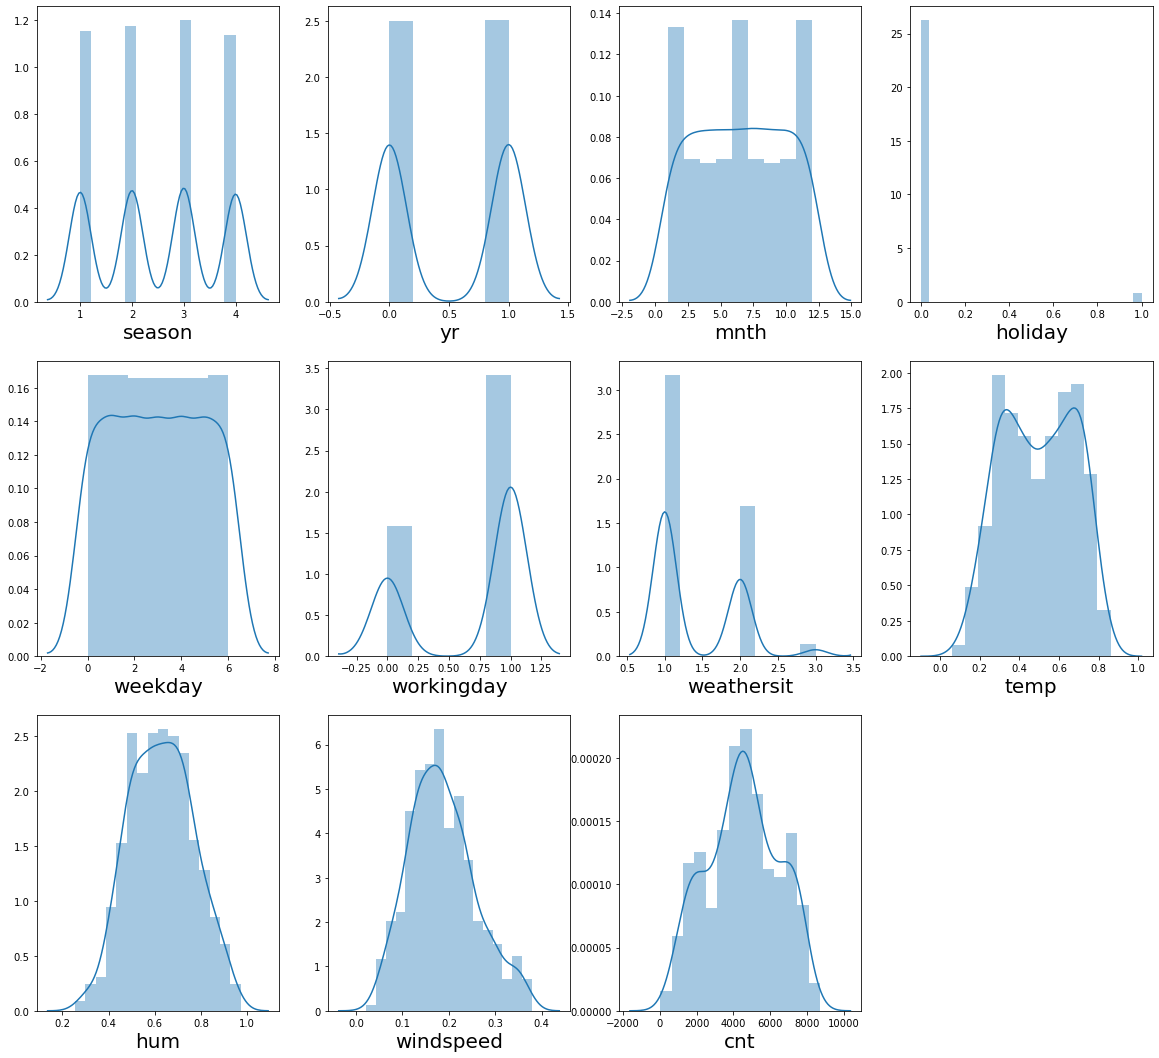

In [27]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Since the data is distributed normally, scaling isn't required. We can proceed with data splitting 

In [28]:
categorical_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### MODEL DEVELOPMENT

In [29]:
# Create dummy variables

data = pd.get_dummies(data, columns = categorical_var) 

data.shape

(731, 36)

In [30]:
#predictors and target

X = data.drop(['cnt'], axis = "columns")
y = data['cnt']

In [31]:
#divide the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [32]:
# creating function to calulate MAPE
def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE


### Linear Regression

In [33]:
lr= LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_LR= lr.predict(X_test)

In [36]:
r2_score(y_test, y_pred_LR)

0.8074472692401635

In [37]:
Mape_LR= MAPE(y_test, y_pred_LR)
print("MAPE ="+str(Mape_LR))

MAPE =24.046271082160825


In [38]:
Accuracy_LR = 100 - Mape_LR
print("Accuracy= " + str(Accuracy_LR))

Accuracy= 75.95372891783917


### Decision Tree

In [39]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [40]:
#prediction on test data
y_pred_DT = fit_DT.predict(X_test)

In [41]:
## R^2 calculation for test data
r2_score(y_test, y_pred_DT)

0.6464697716428666

In [42]:
Mape_DT = MAPE(y_test, y_pred_DT)
print("MAPE ="+str(Mape_DT))

MAPE =36.94809301452646


In [43]:
Accuracy_DT = 100 - Mape_DT
print("Accuracy= " + str(Accuracy_DT))

Accuracy= 63.05190698547354


### Random Forest

In [44]:
rf = RandomForestRegressor(n_estimators=10)

In [45]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [46]:
y_pred_RF= rf.predict(X_test)

In [47]:
r2_score(y_test, y_pred_RF)

0.8736547039195516

In [48]:
Mape_RF = MAPE(y_test, y_pred_RF)
print("MAPE ="+str(Mape_RF))

MAPE =19.90778258013038


In [49]:
Accuracy_RF = 100 - Mape_RF
print("Accuracy= " + str(Accuracy_RF))

Accuracy= 80.09221741986963


### Gradient Boosting

In [50]:
# Build model on train data
GB = GradientBoostingRegressor().fit(X_train, y_train)

In [51]:
# predict on test data
pred_test_GB = GB.predict(X_test)

In [52]:
# calculate R^2 on test data
r2_score(y_test, pred_test_GB)

0.8839146143324043

In [53]:
Mape_GB = MAPE(y_test, pred_test_GB)
print("MAPE ="+str(Mape_GB))

MAPE =18.695706619022438


In [54]:
Accuracy_GB = 100 - Mape_GB
print("Accuracy= " + str(Accuracy_GB))

Accuracy= 81.30429338097755


### GridSearchCV for Random Forest

In [127]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

#Calculating MAPE
Mape_gRF = MAPE(y_test, predictions_GRF)

# Calculating Accuracy
accuracy = 100 - Mape_gRF


print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print("MAPE ="+str(Mape_gRF))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 13, 'n_estimators': 12}
R-squared = 0.87.
MAPE =21.308642569783053
Accuracy = 78.69%.


### GridSearchCV for Gradient Boosting

In [65]:
gbr_gs = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(100,120,2))
depth = list(range(1,10,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gbr_gs, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)

best_params_Ggb = gridcv_gb.best_params_
best_estimator_Ggb = gridcv_gb.best_estimator_

#Apply model on test data
predictions_Ggb = best_estimator_Ggb.predict(X_test)

#R^2
GGB_r2 = r2_score(y_test, predictions_Ggb)

#Calculating MAPE
Mape_gGB = MAPE(y_test, predictions_Ggb)

# Calculating Accuracy
accuracy = 100 - Mape_gGB


print('Grid Search CV Gradient Boosting Regressor Model Performance:')
print('Best Parameters = ',best_params_Ggb)
print('R-squared = {:0.2}.'.format(GGB_r2))
print("MAPE ="+str(Mape_gGB))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Grid Search CV Gradient Boosting Regressor Model Performance:
Best Parameters =  {'max_depth': 3, 'n_estimators': 110}
R-squared = 0.88.
MAPE =18.829153637435322
Accuracy = 81.17%.


#### From all above models, we can see that Gradient Boosting Regressor performs well with with 81.33% accuracy

### Example of output with a sample input.


In [129]:
#Using Gradient Boosting model
GB.predict([[0.2,0.4,0.1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1]])

array([1664.98890512])